### Работу выполняли
**Соколов Ян\
Екимов Егор\
Токкожин Арсен**

# Домашнее задание 1
## Sentiment Analysis in Russian

*deadline*: 2 октября 2022, 23:59

В этом домашнем задании вы будете работать с корпусом новостных текстов на русском языке. Корпус собран из заметок новостных сайтов с указанием на тональность данного текста.

Корпус описан и представлен по ссылке: https://www.kaggle.com/competitions/sentiment-analysis-in-russian/data

Части 1, 2 задания должны быть выполнены на полных текстах, Часть 3 – на разбиении на тестовое, отладочное и обучающее множества (которое вы должно произвести самостоятельно). Тестовое множество должно быть использовано исключительно для тестирования моделей, обучающее и отладочное – для выбора модели и параметров. 


## ПРАВИЛА
1. Домашнее задание выполняется в группе до 3-х человек.
2. Домашнее задание оформляется в виде отчета либо в .pdf файле, либо jupyter-тетрадке. 
3. Отчет должен содержать: имена всех членов группы, нумерацию заданий и пунктов, которые вы выполнили, код решения, и понятное пошаговое описание того, что вы сделали. Отчет должен быть написан в академическом стиле, без излишнего использования сленга и с соблюдением норм русского языка.
4. Не стоит копировать фрагменты лекций, статей и Википедии в ваш отчет.
5. Отчеты, состоящие исключительно из кода, не будут проверены и будут автоматически оценены нулевой оценкой.
6. Плагиат и любое недобросовестное цитирование приводит к обнулению оценки. 

In [1]:
# !unzip sentiment-analysis-in-russian.zip

## Часть 1. [2 балла] Эксплоративный анализ 
1. Найдите топ-300 слов по частоте без учета стоп-слов.
2. Найдите топ слов, характеризующих каждую тональность отдельно. 

[бонус] Постройте тематическую модель по данному корпусу.

[бонус] Найдите еще что-то интересное в корпусе (что-то специфичное для данной темы)

In [12]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from string import punctuation
import matplotlib.pyplot as plt

plt.style.use('ggplot')


In [3]:
## считаем данные

df = pd.read_json('train.json')
df.head()

,text,id,sentiment
0,Досудебное расследование по факту покупки ЕНПФ...,1945,negative
1,Медики рассказали о состоянии пострадавшего му...,1957,negative
2,"Прошел почти год, как железнодорожным оператор...",1969,negative
3,По итогам 12 месяцев 2016 года на территории р...,1973,negative
4,Астана. 21 ноября. Kazakhstan Today - Агентств...,1975,negative


In [11]:
## посмотрим на распределение классов
(df['sentiment'].value_counts(normalize=True) * 100).astype(int)

neutral     48
positive    33
negative    17
Name: sentiment, dtype: int64

In [15]:
df.sample(1).iloc[0]['text']

'«Здесь уже нет того транспортного коллапса, который возник в первый день ее внедрения. Чтобы ситуация не повторилась, представители компании «Astra Park» намерены усовершенствовать систему с учетом ошибок», - указывается в статье.   \n\nНапомним, первый день введения платных парковок на привокзальной площадь выдался суматошным как для водителей, так и для представителей компании «Астана LRT». \n\n«Местные бомбилы, облюбовавшие прибыльное место, устроили настоящий саботаж. На завязавшийся спор туже отреагировало руководство ТОО «Астана LRT», отправившись в самую гущу происходящего. Затем экстренно был организован брифинг для журналистов, дабы разъяснить возникшую ситуацию», сообщается в издании. \n\nПо мнению директора по транспорту ТОО «Астана LRT» Рустама ХАЛИЛОВА, возникшие обстоятельства, к сожалению, были вполне предсказуемы. И дело вовсе не в недочетах системы. Здесь, как обычно, свою роль сыграл пресловутый человеческий фактор. - В первую очередь, платная парковка здесь была уст

In [16]:
## создадим колонку text_tokenized с очищенным от пунктуации и стоп слов текстом
## и токенизируем его с помощью word_tokenize из библиотеки nltk

noise = stopwords.words('russian') + list(punctuation) + ['«', '»', '``', '\'\'', '–', '—']

df['text_tokenized'] = df['text'].str.lower().str.strip().apply(lambda x: word_tokenize(x, language='russian'))
df['text_tokenized'] = df['text_tokenized'].apply(lambda x: [w for w in x if w not in noise])

## Топ 300 слов

In [18]:
## найдем топ 300 слов по встречаемости во всех предложениях
top300 = df['text_tokenized'].explode().value_counts().head(300)
top20 = top300.head(20)
top300

года        22765
тенге       15326
это         13620
году        11196
также       10934
            ...  
сентября     1160
момент       1160
являются     1158
текущего     1155
работе       1150
Name: text_tokenized, Length: 300, dtype: int64

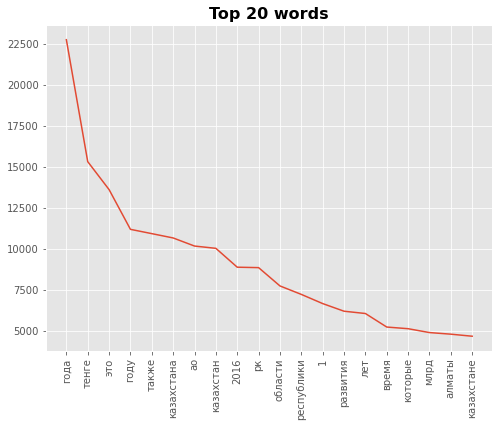

In [19]:
## график топ 20 слов по встречаемости во всех предложениях

plt.figure(figsize=(8, 6))
plt.title('Top 20 words', weight='bold', size=16)
plt.plot(top20)
plt.xticks(top20.index, rotation=90)
plt.show()

**Вывод:**  топ слов показывает нам что речь в текстах идет возможно об экономике Казахстана 2016 года

/var/folders/7r/3bj773_x3qv873q1y8mhs8yh0000gn/T/ipykernel_27801/1121671770.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(df_sent.get(val).index, rotation=90)


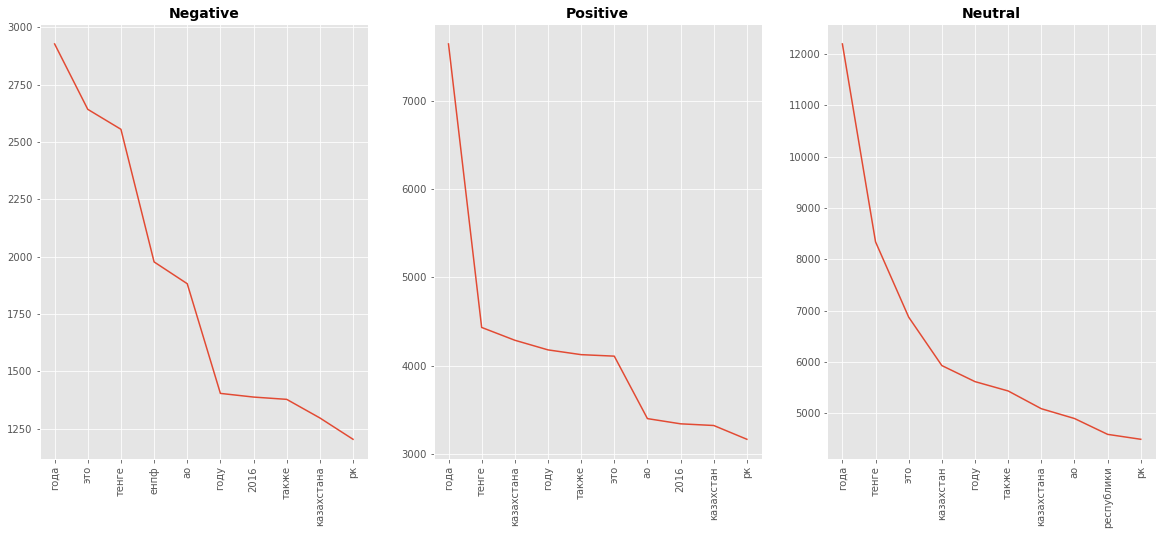

In [20]:
## топ 10 слов для каждой тональности

df_sent = df.groupby(['sentiment']).apply(lambda x: x['text_tokenized'].explode().value_counts().head(10))

fig, axs = plt.subplots(1, 3, figsize=(20, 8))
for i, val in enumerate(df['sentiment'].unique()):
    axs[i].plot(df_sent.get(val))
    axs[i].set_xticklabels(df_sent.get(val).index, rotation=90)
    axs[i].set_title(val.capitalize(), weight='bold', size=14)

**Вывод:**  топ слов примено одинаковый во всех категориях, за исключением слова "енпф" в негативных текстах.

In [21]:
(df['sentiment'].value_counts(normalize=True) * 100).astype(int).apply(lambda x: f'{x}%')

neutral     48%
positive    33%
negative    17%
Name: sentiment, dtype: object

## Часть 2. [2 балла] Модели представления слов 
Обучите модель представления слов (word2vec, GloVe, fastText или любую другую) на материале корпуса.
1. Продемонстрируйте, как работает поиск синонимов, ассоциаций, лишних слов в обученной модели. 
2. Визуализируйте топ-300 слов по частоте без учета стоп-слов (п. 1.1) с помощью TSNE или UMAP (https://umap-learn.readthedocs.io).

In [32]:
import gensim
from gensim.models import word2vec
from bokeh.models import ColumnDataSource, LabelSet
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook
from nltk import FreqDist
from tqdm.notebook import tqdm
from sklearn.manifold import TSNE


In [23]:
## используем модель Word2Vec

w2v = word2vec.Word2Vec(sentences=df['text_tokenized'])

In [28]:
## посмотрим на поиск синоноимов в обученной модели

for anything in df['text_tokenized'].explode().sample(3):
    print(anything)
    if anything in w2v.wv.key_to_index.keys():
        for word, sim in w2v.wv.most_similar(positive=anything, topn=5):
            print(word, ': ', sim)
        print('\n')

которые
такие :  0.6224866509437561
которыми :  0.615217924118042
которым :  0.5914586186408997
приходящих :  0.5694114565849304
которых :  0.5656608939170837


небольшой
девальвационные :  0.873454749584198
расти :  0.8550701141357422
получилась :  0.847270667552948
вверх :  0.8451260328292847
снижаться :  0.8373439311981201


крупных
нацкомпаний :  0.7721298933029175
дочерних :  0.7692662477493286
электросетевых :  0.7692287564277649
ведущих :  0.766633927822113
корпораций :  0.7470893859863281




In [29]:
## посмотрим как работает определитель лишних слов

w2v.wv.doesnt_match('казахстан корея пенсия'.split())

'пенсия'

In [30]:
## посмотрим как работает определитель лишних слов

w2v.wv.doesnt_match('банк кредит года'.split())

'года'

In [33]:
## визуализируем топ-300 слов

top_words = []

## посчитаем частоту встречаемости каждого слова
fd = FreqDist()
for s in tqdm(df['text_tokenized']):
    fd.update(s)

for w in fd.most_common(300):
    top_words.append(w[0])
    
top_words_vec = w2v.wv[top_words]

## трансформирум слова в двумерные векторы для визуализации
tsne = TSNE(n_components=2, random_state=0)
top_words_tsne = tsne.fit_transform(top_words_vec)

  0%|          | 0/8263 [00:00<?, ?it/s]

In [34]:
output_notebook()

p = figure(tools="pan, wheel_zoom, reset, save",
           toolbar_location="above",
           title="word2vec T-SNE (eng model, top1000 words)")

source = ColumnDataSource(data=dict(x1=top_words_tsne[:,0],
                                    x2=top_words_tsne[:,1],
                                    names=top_words))

p.scatter(x="x1", y="x2", size=8, source=source)

labels = LabelSet(x="x1", y="x2", text="names", y_offset=6,
                  text_font_size="8pt", text_color="#555555",
                  source=source, text_align='center')
p.add_layout(labels)

show(p)

Loading BokehJS ...

**Вывод:** видно что слова близкие по смыслу лежат вместе

## Часть 3. [5 баллов] Классификация текстов
Задача классификации формулируется так: каждая новостная статья описывает какую-то ситуацию, имеющую определенную тональность. Требуется по тексту предсказать, какую тональность имеет данная статья. Таким образом, тональность - это фактически метка класса. Основная мера качества – macro $F_1$.
Обучите несколько классификаторов и сравните их между собой. Оцените качество классификаторов на каждом из классв. Какие классы чаще всего оказываются перепутаны? Связаны ли ошибки со смыслом текстов?

Используйте фрагменты из множества train для обучения, из множества dev для отладки, из множества test – для тестирования и получения итоговых результатов. 

1. [1 балл] Используйте fastText в качестве baseline-классификатора.
2. [2 балла] Используйте сверточные сети в качестве более продвинутого классификатора. Поэкспериментируйте с количеством и размерностью фильтров, используйте разные размеры окон, попробуйте использовать $k$-max pooling. 
3. [2 балла] Попробуйте расширить обучающее множество за счет аугментации данных. Если вам понадобится словарь синонимов, можно использовать WordNet (ниже вы найдете примеры).

[бонус] Используйте результат max pooling'а как эмбеддинг входного текста. Визуализируйте эмбеддинги 300-500 предложений из обучающего множества и изучите свойства получившегося пространства.

[бонус] Используйте ваш любимый классификатор и любые (честные) способы повышения качества классификации и получите macro $F_1$ больше 0.5.

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import fasttext
import numpy as np


## fasttext as baseline

In [36]:
## разделим данные на тренировочную и тестовую выборки

X = df['text_tokenized'].apply(lambda x : " ".join(x)).tolist()
y = df['sentiment'].tolist()

X, y = np.array(X), np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print ("total train examples %s" % len(y_train))
print ("total test examples %s" % len(y_test))

total train examples 5536
total test examples 2727


In [37]:
## запишем полученные выборки в файлы

with open('data.train.txt', 'w+', encoding='utf-8') as outfile:
    for i in range(len(X_train)):
        outfile.write('__label__' + y_train[i] + ' '+ X_train[i] + '\n')
    

with open('dev.txt', 'w+', encoding='utf-8') as outfile:
    for i in range(len(X_test)):
        outfile.write('__label__' + y_test[i] + ' ' + X_test[i] + '\n')

In [39]:
## обучим fasttext и измерим скор

classifier = fasttext.train_supervised('data.train.txt')
result = classifier.test('dev.txt')

y_pred = classifier.predict(y_test.tolist())
print('Macro F1:', f1_score(np.array(list(map(lambda x : "__label__" + x, y_test))),
                            np.array(y_pred[0]).squeeze(), average='macro'))

Read 2M words
Number of words:  141844
Number of labels: 3
Progress: 100.0% words/sec/thread: 2122502 lr:  0.000000 avg.loss:  1.030390 ETA:   0h 0m 0s


Macro F1: 0.22085989864312575


**Вывод:** используем это число как baseline

## CNN

In [54]:
import torch
from torchtext.legacy import data
from torchtext.legacy import datasets
from torchtext.vocab import build_vocab_from_iterator
from torch import nn
import torch.optim as optim
from torch.nn import functional as F

import pymorphy2
from functools import lru_cache
from multiprocessing import Pool
import re

from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from sklearn.preprocessing import LabelEncoder




In [44]:
SEED = 0
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
tqdm.pandas()

In [45]:
m = pymorphy2.MorphAnalyzer() 

def lemmatize(text, pymorphy=m):
    try:
        return " ".join([pymorphy.parse(w)[0].normal_form for w in text])
    except:
        return " "    
    

def dataset_iterator(texts):
    for text in texts:
        yield text.split()

In [50]:
## lemmatize text

df['text_lemmatized'] = df['text_tokenized'].progress_apply(lambda x : lemmatize(x))

  0%|          | 0/8263 [00:00<?, ?it/s]

In [55]:
vocab = build_vocab_from_iterator(
    dataset_iterator(df['text_lemmatized']),
    specials=['<pad>', '<unk>'], min_freq=10,
)

TypeError: build_vocab_from_iterator() got an unexpected keyword argument 'specials'

In [318]:
df_train, df_test = train_test_split(df, test_size=0.2)

In [319]:
train_tokens = []
for text in dataset_iterator(df_train['text_lemmatized']):
    tokens = [vocab[word] if word in vocab else vocab['<unk>'] for word in text]
    train_tokens += [tokens]

test_tokens = []
for text in dataset_iterator(df_test['text_lemmatized']):
    tokens = [vocab[word] if word in vocab else vocab['<unk>'] for word in text]
    test_tokens += [tokens]

In [320]:
max_length = 300
tokenized_train = torch.full((len(train_tokens), max_length), vocab['<pad>'], dtype=torch.int32)
for i, tokens in enumerate(train_tokens):
    length = min(max_length, len(tokens))
    tokenized_train[i, :length] = torch.tensor(tokens[:length])

tokenized_test = torch.full((len(test_tokens), max_length), vocab['<pad>'], dtype=torch.int32)
for i, tokens in enumerate(test_tokens):
    length = min(max_length, len(tokens))
    tokenized_test[i, :length] = torch.tensor(tokens[:length])

In [321]:
## 

class MyDataset(Dataset):
    def __init__(self, X, y):
        self.y = torch.tensor(y)
        self.X = torch.tensor(X)

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, i): 
        return self.X[i], self.y[i]

In [322]:
lenc = LabelEncoder()
df_train['sentiment'] = lenc.fit_transform(df_train['sentiment'])
df_test['sentiment'] = lenc.transform(df_test['sentiment'])

C:\Users\User\AppData\Local\Temp\ipykernel_564\831503199.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['sentiment'] = lenc.fit_transform(df_train['sentiment'])
C:\Users\User\AppData\Local\Temp\ipykernel_564\831503199.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['sentiment'] = lenc.transform(df_test['sentiment'])


In [323]:
torch.manual_seed(101)

batch_size = 128

train_dataset = MyDataset(
    tokenized_train,
    df_train['sentiment'].values
)
test_dataset = MyDataset(
    tokenized_test,
    df_test['sentiment'].values
)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=512, shuffle=False)

X, y = next(iter(train_loader))

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: torch.Size([128, 300])
Target shape: torch.Size([128])


C:\Users\User\AppData\Local\Temp\ipykernel_564\1659912707.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.X = torch.tensor(X)


In [324]:
def binary_accuracy(preds, y):
    rounded_preds = torch.round(F.sigmoid(preds))
    correct = (rounded_preds == y).float()
    acc = correct.sum() / len(correct)
    return acc


def train_func(model, iterator, optimizer, criterion):
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    
    for text, label in tqdm(iterator):
        optimizer.zero_grad()
        logits = model(text) ###
        loss = criterion(logits, label.long()) ###
        acc = (logits.argmax(dim=-1) == label).sum().item()
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss
        epoch_acc += acc
        
    return epoch_loss / len(iterator.dataset), epoch_acc / len(iterator.dataset)

def evaluate_func(model, iterator, criterion):
    epoch_loss = 0
    epoch_acc = 0
    
    model.eval()
    
    with torch.no_grad():
        for text, label in tqdm(iterator):
            logits = model(text)
            loss = criterion(logits, label.long())
            acc = (logits.argmax(dim=-1) == label).sum().item()
            

            epoch_loss += loss
            epoch_acc += acc
        
    return epoch_loss / len(iterator.dataset), epoch_acc / len(iterator.dataset)


class CNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, n_filters, filter_sizes, output_dim, dropout):
        super().__init__()
        
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.conv_0 = nn.Conv2d(in_channels=1, out_channels=n_filters, kernel_size=(filter_sizes[0], embedding_dim))
        self.conv_1 = nn.Conv2d(in_channels=1, out_channels=n_filters, kernel_size=(filter_sizes[1], embedding_dim))
        self.conv_2 = nn.Conv2d(in_channels=1, out_channels=n_filters, kernel_size=(filter_sizes[2], embedding_dim))
        self.fc = nn.Linear(len(filter_sizes) * n_filters, output_dim)
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, x):
        embedded = self.embedding(x)
        embedded = embedded.unsqueeze(1)
        conved_0 = F.relu(self.conv_0(embedded).squeeze(3))
        conved_1 = F.relu(self.conv_1(embedded).squeeze(3))
        conved_2 = F.relu(self.conv_2(embedded).squeeze(3))
        pooled_0 = F.max_pool1d(conved_0, conved_0.shape[2]).squeeze(2)
        pooled_1 = F.max_pool1d(conved_1, conved_1.shape[2]).squeeze(2)
        pooled_2 = F.max_pool1d(conved_2, conved_2.shape[2]).squeeze(2)
        cat = self.dropout(torch.cat((pooled_0, pooled_1, pooled_2), dim=1))
        return self.fc(cat)

In [325]:
INPUT_DIM = len(vocab)
EMBEDDING_DIM = 100
N_FILTERS = 100
FILTER_SIZES = [3,4,5]
OUTPUT_DIM = 3 ## now it is n_classes
DROPOUT = 0.5

model = CNN(INPUT_DIM, EMBEDDING_DIM, N_FILTERS, FILTER_SIZES, OUTPUT_DIM, DROPOUT)

In [326]:
optimizer = optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()

In [327]:
N_EPOCHS = 5

for epoch in range(N_EPOCHS):
    train_loss, train_acc = train_func(model, train_loader, optimizer, criterion)
    valid_loss, valid_acc = evaluate_func(model, test_loader, criterion)
    
    print(f'Epoch: {epoch+1:02}, Train Loss: {train_loss:.3f}, Train Acc: {train_acc*100:.2f}%, Val. Loss: {valid_loss:.3f}, Val. Acc: {valid_acc*100:.2f}%')

  0%|          | 0/52 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch: 01, Train Loss: 0.009, Train Acc: 45.02%, Val. Loss: 0.002, Val. Acc: 61.04%


  0%|          | 0/52 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch: 02, Train Loss: 0.007, Train Acc: 56.05%, Val. Loss: 0.002, Val. Acc: 55.84%


  0%|          | 0/52 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch: 03, Train Loss: 0.007, Train Acc: 61.21%, Val. Loss: 0.002, Val. Acc: 62.61%


  0%|          | 0/52 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch: 04, Train Loss: 0.006, Train Acc: 64.80%, Val. Loss: 0.002, Val. Acc: 66.06%


  0%|          | 0/52 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch: 05, Train Loss: 0.006, Train Acc: 67.58%, Val. Loss: 0.002, Val. Acc: 68.00%


In [310]:
def predict(model, iterator):
    model.eval()
    predictions = torch.Tensor()
    with torch.no_grad():
        for text, label in tqdm(iterator):
            logits = model(text)
            predictions_ = logits.argmax(dim=-1)
            predictions = torch.cat([predictions, predictions_])
    return predictions

In [328]:
y_pred = predict(model, test_loader)

  0%|          | 0/4 [00:00<?, ?it/s]

In [329]:
y_pred = np.array(y_pred).astype(int)

In [330]:
print('Macro F1:', f1_score(df_test['sentiment'], y_pred, average='macro'))

Macro F1: 0.6494363612817091


## word2vec + random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
w2v = word2vec.Word2Vec(sentences=df['text_tokenized'])

In [56]:
## create mean sentence vector

def avg_word_vectors(w2v, wordlist):
    sumvec = np.zeros(shape=(1, w2v.vector_size))
    cnt = 0
    for w in wordlist:
        if w in w2v.wv.key_to_index:
            sumvec += w2v.wv[w]
            cnt += 1
    if cnt == 0:
        cnt = 1
    return sumvec / cnt

In [ ]:
X = df['text_tokenized']
y = df['sentiment']

X = np.concatenate(X.apply(lambda x : avg_word_vectors(w2v, x)).values)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)
print('Macro F1:', f1_score(y_test, y_pred, average='macro'))

## Часть 4. [1 балл] Итоги
Напишите краткое резюме проделанной работы. Обобщите все полученные вами результаты и сделайте выводы.

Проведя эксперименты с различными моделями, лучший результат показал word2vec в сочетании и деревьями решений, превзойдя baseline, полученный с помощью fasttext.


CNN так же превзошел baseline и показал скор схожий со скором, полученным с помощью RF.


Перебор параметров для CNN не дал/дал ...

Лемматизация ...

### Как использовать WordNet из nltk?

In [ ]:
# скачиваем WordNet
import nltk
nltk.download('wordnet')

In [ ]:
# слово -> множество синсетов (синонимов разных смыслов исходного слова)
from nltk.corpus import wordnet as wn
wn.synsets('magic')

In [ ]:
# посмотрим, что внутри одного синсета
wn.synsets('magic')[1].lemmas()[0]

In [ ]:
# возьмем лемму одного из слов из синсета
wn.synsets('magic')[1].lemmas()[-1].name()